In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import numpy as np

### Загрузка датасета iris

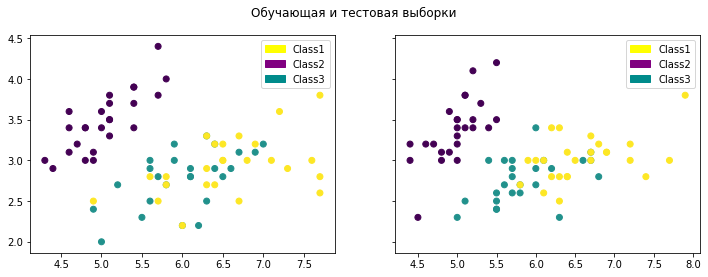

In [2]:
# Iris test data
X_test = load_iris().data
y_test = load_iris().target

# Iris train data (1/2 of test data)
X_train = np.concatenate((X_test[0:25], X_test[50:75], X_test[100:125]))
y_train = np.concatenate((y_test[0:25], y_test[50:75], y_test[100:125]))
X_test = np.concatenate((X_test[25:50], X_test[75:100], X_test[125:150]))
y_test = np.concatenate((y_test[25:50], y_test[75:100], y_test[125:150]))

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('Обучающая и тестовая выборки')
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train)
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test)

patch1 = mpatches.Patch(color='yellow', label='Class1')
patch2 = mpatches.Patch(color='purple', label='Class2')
patch3 = mpatches.Patch(color='darkcyan', label='Class3')

axs[0].legend(loc=1, handles=[patch1, patch2, patch3])
axs[1].legend(loc=1, handles=[patch1, patch2, patch3])

### Генерация датасета (заменяет датасет irirs)

dataset random separator: 136


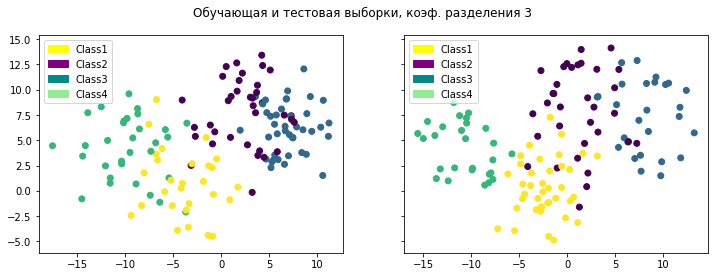

In [3]:
# Separation - разделимость классов (1.05 для линейно разделимых, 2 для пересечения 10-20%, 3.5 для пересечения 50-70%)
Separability = 3

# randomInt - случайное число из указанного диапазона. Если в датасете 400 объектов, а randomInt равен 136,
# то первые 136 элементов будут отнесены к обучающей выборке, следующие 136 к валидационной, а оставшиеся к тестовой.
randomInt = np.random.randint(136, 156)
print('dataset random separator:', randomInt)

# Generate dataset
(X_blobs, y_blobs) = make_blobs(n_samples=400, n_features=2, centers=4, cluster_std=Separability, random_state=20)

# Train data (first randomInt-1 elements)
X_train = X_blobs[0:randomInt]
y_train = y_blobs[0:randomInt]
# Validate data (from randomInt to randomInt*2-1)
X_valid = X_blobs[randomInt:randomInt*2]
y_valid = y_blobs[randomInt:randomInt*2]
# Test data (the rest of the dataset)
X_test = X_blobs[randomInt*2 + 1:-1]
y_test = y_blobs[randomInt*2 + 1:-1]

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle('Обучающая и тестовая выборки, коэф. разделения {}'.format(Separability))
axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train)
axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test)

patch1 = mpatches.Patch(color='yellow', label='Class1')
patch2 = mpatches.Patch(color='purple', label='Class2')
patch3 = mpatches.Patch(color='darkcyan', label='Class3')
patch4 = mpatches.Patch(color='lightgreen', label='Class4')

axs[0].legend(loc=2, handles=[patch1, patch2, patch3, patch4])
axs[1].legend(loc=2, handles=[patch1, patch2, patch3, patch4])

In [4]:
# Создание экземпляров классификаторов и их обучение
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

clf = Perceptron(tol = 1e-3, random_state = 0)
clf.fit(X_train, y_train)

mlp = MLPClassifier(hidden_layer_sizes=(4), max_iter=1000)
mlp.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=4, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [5]:
# Классификация тестовых данных
lg_result = lg_model.predict(X_test)
clf_result = clf.predict(X_test)
mlp_result = mlp.predict(X_test)

### Отображение классификации. Для количества признаков > 2 будет показана двумерная проекция

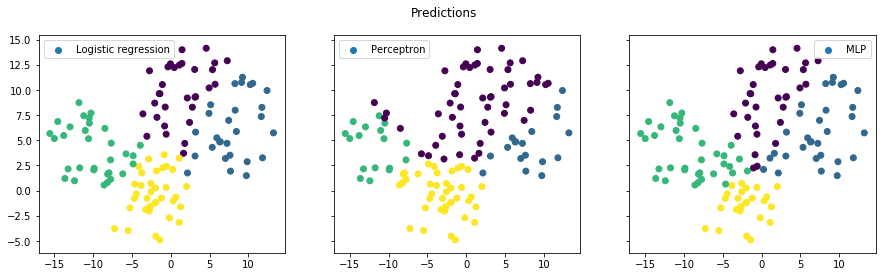

In [6]:
fig1, axs1 = plt.subplots(1, 3,  figsize=(15, 4), sharey=True)
fig1.suptitle('Predictions')

axs1[0].scatter(X_test[:, 0], X_test[:, 1], c = lg_result, label = 'Logistic regression')
axs1[1].scatter(X_test[:, 0], X_test[:, 1], c = clf_result, label = 'Perceptron')
axs1[2].scatter(X_test[:, 0], X_test[:, 1], c = mlp_result, label = 'MLP')

axs1[0].legend(loc = 0)
axs1[1].legend(loc = 0)
axs1[2].legend(loc = 0)

# patchS = mpatches.Patch(label='Sigmoid')
# patchR = mpatches.Patch(label='ReLu')
# patch1 = mpatches.Patch(color='yellow', label='Class1')
# patch2 = mpatches.Patch(color='purple', label='Class2')
# axs1[0].legend(loc=1, handles=[patch1, patch2, patchS])
# axs1[1].legend(loc=1, handles=[patch1, patch2, patchR])

plt.show()

### Подсчет метрик

In [7]:
lg_metrics = precision_recall_fscore_support(y_test, lg_result, average = 'macro') + (accuracy_score(y_test, lg_result), )
clf_metrics = precision_recall_fscore_support(y_test, clf_result, average = 'macro') + (accuracy_score(y_test, lg_result), )
mlp_metrics = precision_recall_fscore_support(y_test, mlp_result, average = 'macro') + (accuracy_score(y_test, mlp_result), )

print('Logistic regression\n\tPrecision: {}\n\tRecall: {}\n\tF-score: {}\n\tAccuracy: {}'.format(
    lg_metrics[0], lg_metrics[1], lg_metrics[2], lg_metrics[4]))

print('Perceptron\n\tPrecision: {}\n\tRecall: {}\n\tF-score: {}\n\tAccuracy: {}'.format(
    clf_metrics[0], clf_metrics[1], clf_metrics[2], clf_metrics[4]))

print('MLP\n\tPrecision: {}\n\tRecall: {}\n\tF-score: {}\n\tAccuracy: {}'.format(
    mlp_metrics[0], mlp_metrics[1], mlp_metrics[2], mlp_metrics[4]))

Logistic regression
	Precision: 0.8149321556579622
	Recall: 0.8266640766640766
	F-score: 0.8191127873563218
	Accuracy: 0.8174603174603174
Perceptron
	Precision: 0.7656454248366013
	Recall: 0.6827246827246827
	F-score: 0.6997018101448481
	Accuracy: 0.8174603174603174
MLP
	Precision: 0.7775067674261222
	Recall: 0.7893680393680393
	F-score: 0.7703744531330738
	Accuracy: 0.7698412698412699


### Отображение тестовой выборки, где истинная принадлежность классам обозначена цветами точек, а области классов, определенных классификаторами, показаны заливкой фона
Только для 2 мерных данных

Text(0.5, 1.0, 'Perceptron')

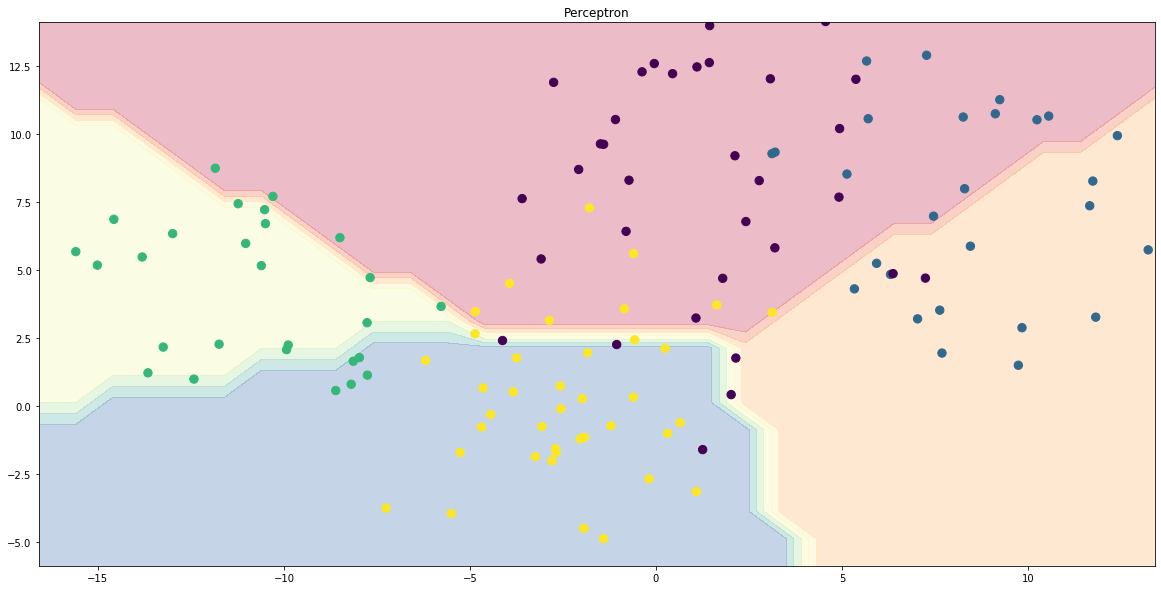

In [8]:
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 0].max() + 1
h = (x_max / x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max),
                         np.arange(y_min, y_max))
X_plot = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,10))
plt.contourf(xx, yy, Z, alpha = 0.3, cmap = 'Spectral')
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 70)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Perceptron')

Text(0.5, 1.0, 'Logistic regression')

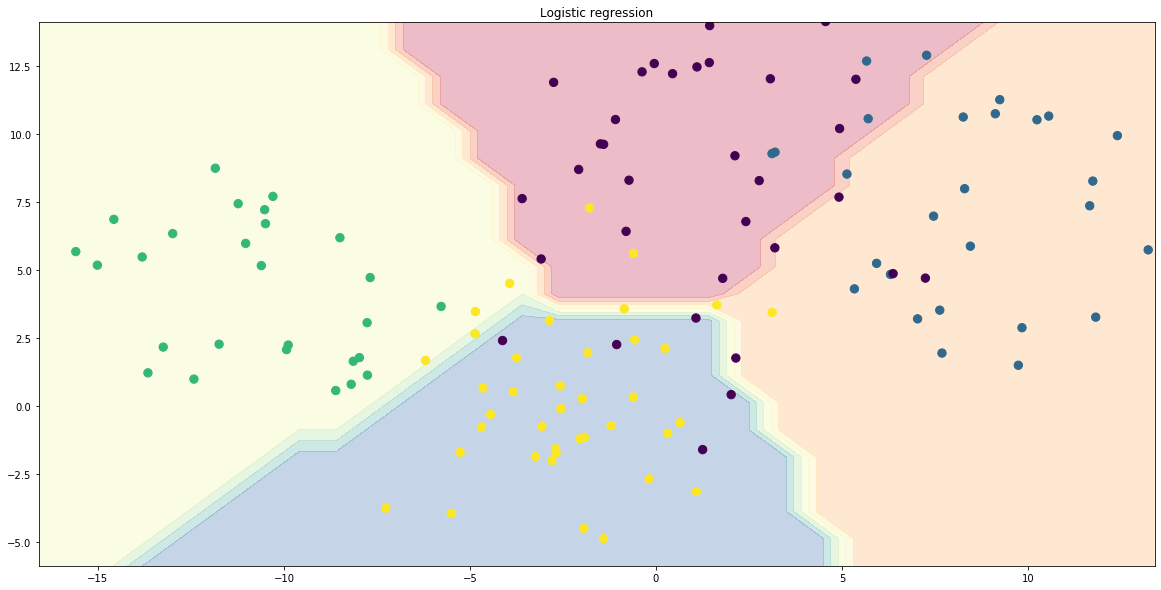

In [9]:
Z = lg_model.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,10))
plt.contourf(xx, yy, Z, alpha = 0.3, cmap = 'Spectral')
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 70)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Logistic regression')

Text(0.5, 1.0, 'MLP')

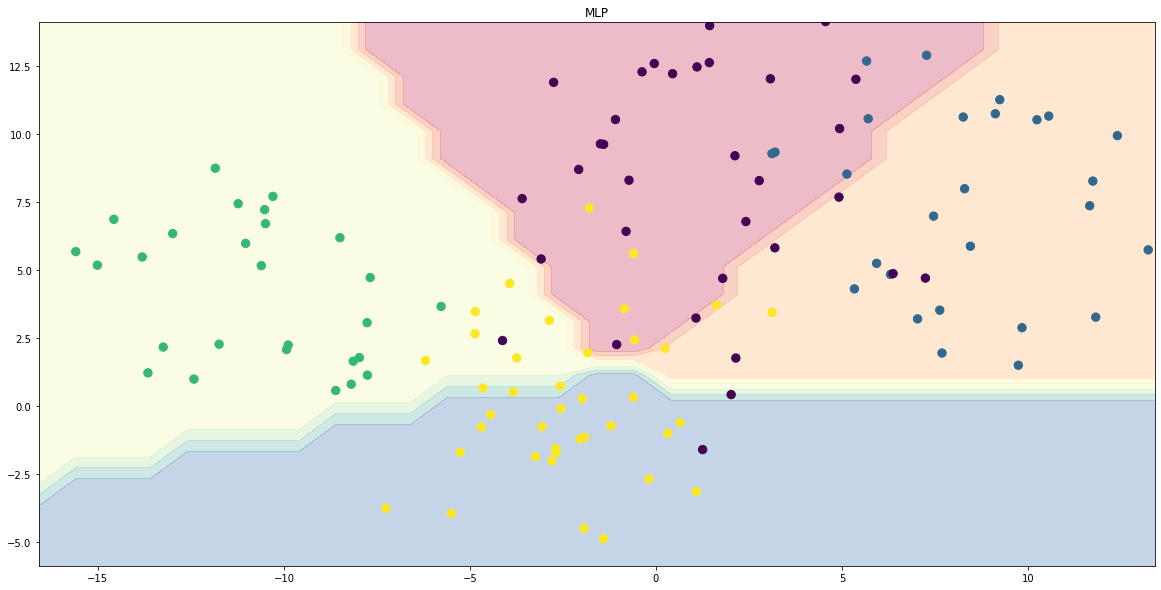

In [10]:
Z = mlp.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,10))
plt.contourf(xx, yy, Z, alpha = 0.3, cmap = 'Spectral')
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 70)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('MLP')